In [1]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import *

In [2]:
def Load(pathname):
    data = np.loadtxt(pathname, delimiter=',')
    features = data[:, :-1]
    labels = data[:, -1]
    return features, labels

# PATH = "5rel-10numAttrs-30totalAttrs-100maxTblSize-100buckets-300.csv\""
# PATH = \5rel-10numAttrs-27totalAttrs-100maxTblSize-100buckets-300.csv\""

# # With gaussian weights.
# PATH = \5rel-10numAttrs-24totalAttrs-100maxTblSize-10buckets-300.csv\""
PATH = "5rel-10numAttrs-22totalAttrs-100maxTblSize-10buckets-3000.csv"

features, labels = Load('./data/train-{}'.format(PATH))
test_features, test_labels = Load('./data/test-{}'.format(PATH))

features = features[:2]; labels = labels[:2]

In [3]:
features.shape, labels.shape

((2, 33), (2,))

In [4]:
scaler = StandardScaler()  # Test MSE 84
scaler = RobustScaler(quantile_range=(25, 75))  # Test MSE 83
scaler = MinMaxScaler()  # Test MSE 84
scaler = MaxAbsScaler()  # Test MSE 84
scaler = QuantileTransformer(output_distribution='uniform')  # Test MSE 84
scaler = QuantileTransformer(output_distribution='normal')  # Test MSE 84
scaler = Normalizer()  # Test MSE 81
features = scaler.fit_transform(features, labels)

In [5]:
# scaler.mean_, scaler.var_

In [6]:
regr = linear_model.LinearRegression()

In [7]:
regr.fit(features, labels)

/Users/zongheng/anaconda/envs/ray-0321/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
test_predicted_labels = regr.predict(scaler.transform(test_features))

In [9]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_labels, test_predicted_labels))
print("Variance score: %.2f"
      % r2_score(test_labels, test_predicted_labels))

print("[train set] labels", labels.shape)
print("[train set] Mean squared error: %.2f"
      % mean_squared_error(labels, regr.predict(features)))

Coefficients: 
 [  7.83482471   0.88518187   0.88518187   0.88518187   7.74033087
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  -0.68423109   0.           0.           0.           0.77007925
   0.           0.           0.08972904   0.           0.
   0.           0.         -24.00853985]
Mean squared error: 146.32
Variance score: -0.36
[train set] labels (2,)
[train set] Mean squared error: 0.00


In [10]:
print('actual test labels', test_labels[:20])
print('predicted test labels', test_predicted_labels[:20])

actual test labels [12.  1.  1.  1. 10.  1.  1.  1. 12.  1.  1.  8. 10. 11.  1.  1.  1. 12.
  1. 17.]
predicted test labels [13.49329913 11.57221262  3.45532077 15.72455555  4.18794143  8.99001929
  5.55996178 11.05096042  2.6054266  12.61742355  7.48576105  1.26172148
  2.32935854 15.04267383  1.9221077  15.38450717  2.74482412  9.6713953
  0.74997376  2.88512687]


In [11]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10,10))
plt.xlabel('example index', fontsize=14)
plt.ylabel('cardinality', fontsize=14)
# plt.scatter(np.arange(len(test_labels)), test_labels, label='truth')
# plt.scatter(np.arange(len(test_predicted_labels)), test_predicted_labels, label='predicted, linear reg.')

plt.plot(test_labels, label='truth')
plt.plot(test_predicted_labels, label='predicted, linear reg.')
plt.legend(fontsize=14)

(-10, 25)

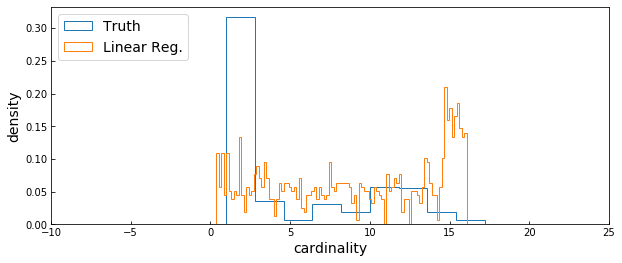

In [12]:

fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(test_labels, bins=50, density=True, histtype='step',
                           cumulative=False, label='Truth')
n, bins, patches = ax.hist(test_predicted_labels, bins=100, density=True, histtype='step',
                           cumulative=False, label='Linear Reg.')
plt.legend(fontsize=14)
plt.xlabel('cardinality', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.xlim(-10,25)